<a href="https://colab.research.google.com/github/yeesem/Natural-Laguage-Processing/blob/main/Chat_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import pickle
import numpy as np

In [224]:
with open("train_qa.txt",'rb') as f:
  train_data = pickle.load(f)

In [225]:
with open("test_qa.txt","rb") as f:
  test_data = pickle.load(f)

In [226]:
type(test_data)

list

In [227]:
type(train_data)

list

In [228]:
len(train_data)

10000

In [229]:
len(test_data)

1000

In [230]:
#Story,Question,Ans
print(train_data[0])

print("\n")

#Story
print(train_data[0][0])

(['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.'], ['Is', 'Sandra', 'in', 'the', 'hallway', '?'], 'no')


['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.']


In [231]:
" ".join(train_data[0][1])

'Is Sandra in the hallway ?'

In [232]:
all_data = test_data + train_data

In [233]:
len(all_data)

11000

In [234]:
test = ["I","am","John","I"]
set1 = set(test)
test2 = ["I","am","Peter","I"]
set1.union(test2)

{'I', 'John', 'Peter', 'am'}

In [235]:
#Set vocab as empty set
vocab = set()

#Set - Only Return unique word
for story,question,answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

In [236]:
vocab.add('no')

In [237]:
vocab.add('yes')

In [238]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [239]:
vocab_len = len(vocab) + 1

In [240]:
vocab_len

38

In [241]:
#Longest story
all_story_lens = [len(data[0]) for data in all_data]

In [242]:
all_story_lens

[12,
 23,
 35,
 47,
 59,
 13,
 26,
 37,
 50,
 62,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 47,
 59,
 12,
 25,
 36,
 48,
 59,
 12,
 26,
 39,
 51,
 63,
 13,
 24,
 37,
 50,
 62,
 13,
 26,
 38,
 50,
 63,
 13,
 25,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 64,
 13,
 25,
 37,
 50,
 62,
 13,
 25,
 37,
 50,
 61,
 12,
 25,
 38,
 50,
 62,
 12,
 25,
 37,
 50,
 61,
 12,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 37,
 49,
 60,
 13,
 25,
 39,
 51,
 64,
 12,
 25,
 37,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 62,
 13,
 25,
 37,
 50,
 62,
 12,
 23,
 35,
 47,
 59,
 12,
 25,
 37,
 48,
 73,
 12,
 24,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 62,
 14,
 26,
 37,
 49,
 62,
 12,
 23,
 35,
 48,
 59,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 37,
 49,
 61,
 12,
 25,
 37,
 50,
 62,
 12,
 24,
 36,
 47,
 58,
 12,
 24,
 36,
 48,
 61,
 25,
 38,
 50,
 62,
 74,
 13,
 25,
 37,
 49,
 62,
 12,
 24,
 37,
 49,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 61,
 12,
 25,
 36,
 50,
 62,


In [243]:
max_story_len = max(all_story_lens)
max_story_len

156

In [244]:
max_question_len = max([len(data[1]) for data in all_data])
print(max_question_len)

6


In [245]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [246]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [247]:
tokenizer.word_index.items()

print(tokenizer.word_index["down"])
print("\n")

for i,(word,count) in enumerate(tokenizer.word_index.items()):
  print(f"{word:<10}: {count}")
  if(i==9):
    break

1


down      : 1
there     : 2
.         : 3
in        : 4
kitchen   : 5
football  : 6
yes       : 7
the       : 8
milk      : 9
got       : 10


In [248]:
train_story_text = []
train_question_text = []
train_ans = []

In [249]:
for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_ans.append(answer)

In [250]:
train_story_text[:5]

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [251]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [252]:
len(train_story_seq)

10000

In [253]:
train_story_seq[:3]

[[11, 20, 16, 8, 26, 3, 33, 32, 16, 8, 27, 3],
 [11,
  20,
  16,
  8,
  26,
  3,
  33,
  32,
  16,
  8,
  27,
  3,
  11,
  13,
  19,
  16,
  8,
  27,
  3,
  17,
  13,
  19,
  16,
  8,
  31,
  3],
 [11,
  20,
  16,
  8,
  26,
  3,
  33,
  32,
  16,
  8,
  27,
  3,
  11,
  13,
  19,
  16,
  8,
  27,
  3,
  17,
  13,
  19,
  16,
  8,
  31,
  3,
  33,
  13,
  16,
  8,
  5,
  3,
  17,
  13,
  19,
  16,
  8,
  26,
  3]]

In [254]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len = max_story_len,max_ques_len = max_question_len):

  #STORIES = X
  X = []
  #QUESTION
  Xq = []
  #Y CORRECT ANS (yes/no)
  Y = []

  for story,question,answer in data:

    #for each story
    #[23,14,...]
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in question]

    y = np.zeros(len(word_index) + 1)
    y[word_index[answer]] = 1

    X.append(x)
    Xq.append(xq)
    Y.append(y)

  #pad_sequences - make all the question and stories in the same length
  return (pad_sequences(X,maxlen = max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))


In [255]:
input_train,question_train,answer_train = vectorize_stories(train_data)

In [256]:
input_test,question_test,answer_test = vectorize_stories(test_data)

In [257]:
answer_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [258]:
input_test

array([[ 0,  0,  0, ...,  8, 27,  3],
       [ 0,  0,  0, ...,  8, 30,  3],
       [ 0,  0,  0, ...,  8, 30,  3],
       ...,
       [ 0,  0,  0, ...,  8, 24,  3],
       [ 0,  0,  0, ...,  8, 30,  3],
       [ 0,  0,  0, ..., 24,  2,  3]], dtype=int32)

In [259]:
tokenizer.word_index['yes']

7

In [260]:
tokenizer.word_index['no']

25

In [261]:
yes = 0
no = 0

for i in range (len(test_data)):
  if train_data[i][2] == 'no':
    no+=1
  else:
    yes+=1

print(yes)
print(no)


508
492


In [262]:
sum(answer_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [263]:
from keras.models import Sequential,Model

In [264]:
from tensorflow.keras.layers import Embedding

In [265]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate

In [266]:
#PLACEHOLDER shape = (max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [267]:
vocab_size = len(vocab) + 1

In [268]:
# INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_size,output_dim = 64))
#Dropout = 0.5, 50% of neuron wil be turned off during the training
#Help in preventing overfitting
input_encoder_m.add(Dropout(0.3))

#OUTPUT
#(samples,story_maxlen,embedding_dim)

In [269]:
# INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))

#OUTPUT
#(samples,story_maxlen,max_question_len)

In [270]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_size,output_dim = 64,input_length = max_question_len))
question_encoder.add(Dropout(0.3))

#(samples,question_maxlen,embedding_dim)

In [271]:
#ENCODED ---> ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [272]:
match = dot([input_encoded_m,question_encoded],axes = (2,2))
match = Activation('softmax')(match)

In [273]:
 response = add([match,input_encoded_c])
 response = Permute((2,1))(response)

In [274]:
answer = concatenate([response,question_encoded])

In [275]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [276]:
from keras.layers import LSTM
answer = LSTM(32)(answer)

In [277]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [278]:
answer = Activation('softmax')(answer)

In [279]:
model = Model([input_sequence,question],answer)

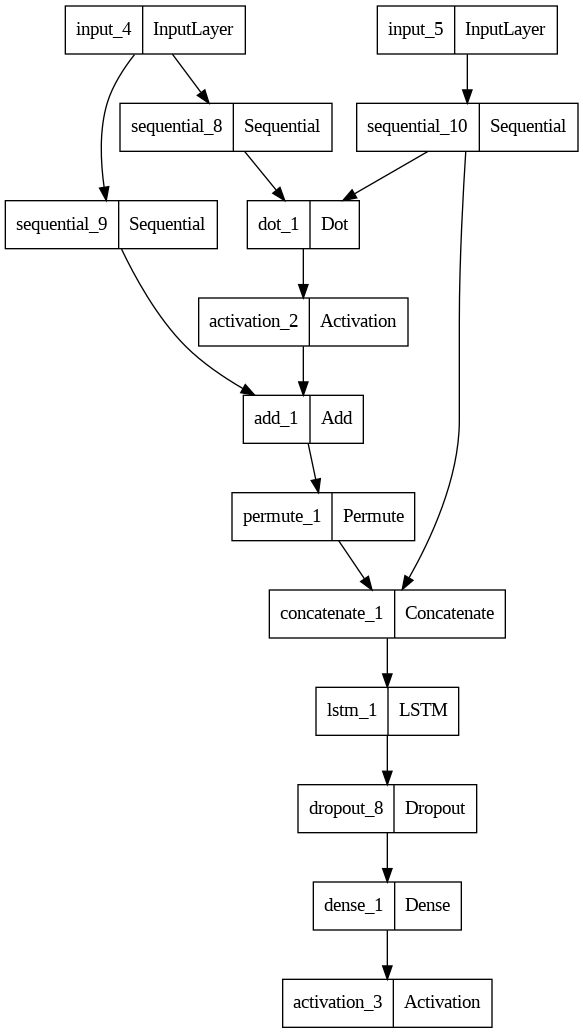

In [280]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [281]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy')

In [282]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential_8 (Sequential)   (None, None, 64)             2432      ['input_4[0][0]']             
                                                                                                  
 sequential_10 (Sequential)  (None, 6, 64)                2432      ['input_5[0][0]']             
                                                                                            

In [283]:
history = model.fit(
    [input_train,question_train],
    answer_train,
    batch_size = 32,
    epochs = 100,
    validation_data = ([input_test,question_test],answer_test)
)

Epoch 1/100
313/313 [==============================] - 7s 16ms/step - loss: 0.9334 - val_loss: 0.7001
Epoch 2/100
313/313 [==============================] - 6s 18ms/step - loss: 0.7089 - val_loss: 0.6937
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6980 - val_loss: 0.6958
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6962 - val_loss: 0.6936
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6965 - val_loss: 0.6944
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6955 - val_loss: 0.6937
Epoch 7/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6955 - val_loss: 0.6936
Epoch 8/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6957 - val_loss: 0.6932
Epoch 9/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6956 - val_loss: 0.6931
Epoch 10/100
313/313 [==============================] - 5s 17ms/step - loss: 0.694

dict_keys(['loss', 'val_loss'])


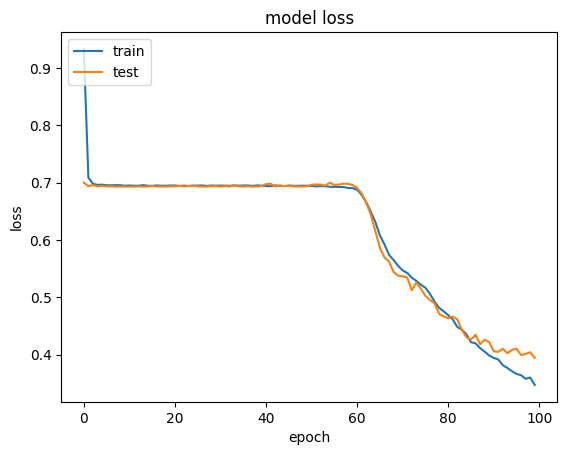

In [293]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())

#Summarize history for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc = "upper left")
plt.show()

In [294]:
model.save("chatbox_model")

In [ ]:
#model = load_model("chatbox_model")

In [295]:
pred_results = model.predict([input_test,question_test])

32/32 [==============================] - 1s 4ms/step


In [296]:
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [297]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [298]:
pred_results.shape

(1000, 38)

In [299]:
pred_results

array([[1.6470246e-07, 1.3922372e-07, 1.3747356e-07, ..., 1.3391198e-07,
        1.8471484e-07, 1.9730753e-07],
       [4.6036725e-08, 3.9493585e-08, 4.7409209e-08, ..., 4.4373692e-08,
        5.2781768e-08, 5.7478722e-08],
       [3.1340040e-08, 2.6808911e-08, 3.4875622e-08, ..., 2.6663166e-08,
        2.6400977e-08, 2.6916659e-08],
       ...,
       [9.8151986e-08, 8.5904936e-08, 9.1387079e-08, ..., 1.0766387e-07,
        1.0511208e-07, 1.2503577e-07],
       [3.3653674e-08, 2.6135025e-08, 2.8335180e-08, ..., 2.5533067e-08,
        2.4316144e-08, 2.2193797e-08],
       [2.6519032e-08, 2.3090111e-08, 2.7571801e-08, ..., 2.1631946e-08,
        1.5750052e-08, 1.6774448e-08]], dtype=float32)

In [ ]:
pred_results[0]

In [301]:
" ".join(test_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [302]:
" ".join(test_data[0][1])

'Is John in the kitchen ?'

In [303]:
test_data[0][2]

'no'

In [304]:
val_max = np.argmax(pred_results[0])

In [305]:
for key,val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [306]:
k

'no'

In [307]:
#Return the probability
pred_results[0][val_max]

0.9952022

In [308]:
#Only can use the vocab that we have trained
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [309]:
my_story = "John left kitchen . Sandra dropped the football in the garden ."

In [310]:
my_story.split()

['John',
 'left',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [311]:
my_ques = "Is the football in the garden ."

In [312]:
my_ques.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '.']

In [313]:
mydata = [(my_story.split(),my_ques.split(),'yes')]

In [314]:
#Same format as my train and test data
mydata

[(['John',
   'left',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '.'],
  'yes')]

In [315]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [316]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        21, 18,  5,  3, 33, 29,  8,  6,  4,  8, 30,  3]], dtype=int32)

In [317]:
my_ques

array([[ 8,  6,  4,  8, 30,  3]], dtype=int32)

In [318]:
pred_results = model.predict([my_story,my_ques])

1/1 [==============================] - 0s 21ms/step


In [319]:
val_max = np.argmax(pred_results[0])

In [320]:
val_max

7

In [321]:
for key,val in tokenizer.word_index.items():
  if val == val_max:
    k = key

In [322]:
#The ans is yes
k

'yes'

In [323]:
pred_results[0][val_max]

0.98412734

In [336]:
def chat_box(story,ques,ans):
  k = "null"

  mydata = [(story.split(),ques.split(),ans)]
  my_story,my_ques,my_ans = vectorize_stories(mydata)

  pred_results = model.predict([my_story,my_ques])
  val_max = np.argmax(pred_results[0])

  for key,val in tokenizer.word_index.items():
    if val == val_max:
      k = key

  print(k," ",pred_results[0][val_max])

In [338]:
story = "john dropped football in garden . john left ."
ques = "Is the football in the kitchen"
ans = 'no'

chat_box(story,ques,ans)

1/1 [==============================] - 0s 33ms/step
no   0.9775713


In [340]:
story = "john dropped football in garden . john left ."
ques = "Is the football in the garden ."
ans = 'no'

chat_box(story,ques,ans)

1/1 [==============================] - 0s 22ms/step
no   0.52638906
